In [1]:
import bt
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import talib

In [2]:
matplotlib.use('TkAgg')
%matplotlib inline

### Build an EMA-based signal strategy

In [3]:
stock_symbol = 'aapl'
start_date = '2019-11-1'
end_date = '2020-12-1'
sma_time_period = 20

In [4]:
price_data = bt.get(stock_symbol, start=start_date, end=end_date)
price_data

,aapl
Date,
2019-11-01,62.658272
2019-11-04,63.069748
2019-11-05,62.979134
2019-11-06,63.006065
2019-11-07,63.733238
...,...
2020-11-24,114.150978
2020-11-25,115.003372
2020-11-27,115.558418


In [5]:
# Compute EMA
ema = talib.EMA(price_data['aapl'], timeperiod=20)
ema = pd.DataFrame(ema)
ema.rename(columns = {0:"aapl"}, inplace=True)
ema

,aapl
Date,
2019-11-01,NaN
2019-11-04,NaN
2019-11-05,NaN
2019-11-06,NaN
2019-11-07,NaN
...,...
2020-11-24,115.674554
2020-11-25,115.610632
2020-11-27,115.605660


In [6]:
bt_strategy = bt.Strategy('AboveEMA',
                         [
                             bt.algos.SelectWhere(price_data > ema),
                             bt.algos.WeighEqually(),
                             bt.algos.Rebalance()
                         ])

In [7]:
bt_backtest = bt.Backtest(bt_strategy, price_data)

In [8]:
bt_result = bt.run(bt_backtest)

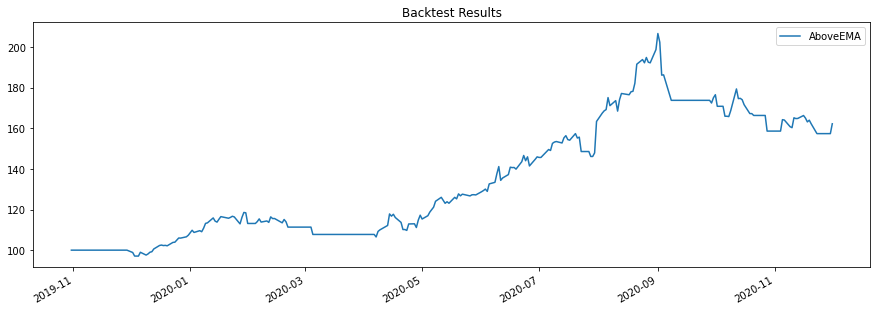

In [9]:
bt_result.plot(title='Backtest Results')
plt.show()

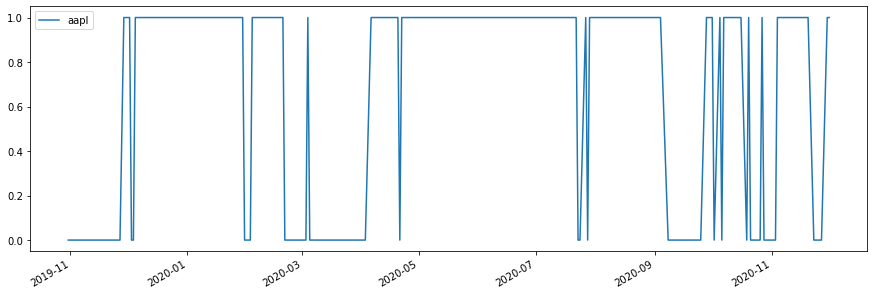

In [10]:
bt_result.plot_security_weights()

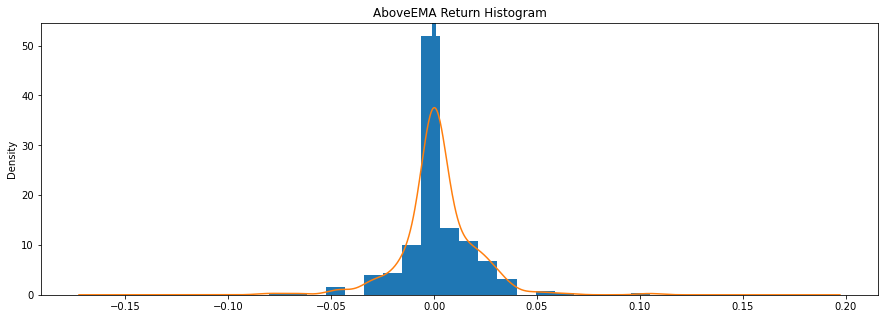

In [11]:
bt_result.plot_histogram()

In [12]:
bt_result.display()

Stat                 AboveEMA
-------------------  ----------
Start                2019-10-31
End                  2020-12-01
Risk-free rate       0.00%

Total Return         62.23%
Daily Sharpe         1.73
Daily Sortino        2.90
CAGR                 56.08%
Max Drawdown         -23.85%
Calmar Ratio         2.35

MTD                  3.08%
3m                   -21.50%
6m                   26.00%
YTD                  51.14%
1Y                   62.23%
3Y (ann.)            -
5Y (ann.)            -
10Y (ann.)           -
Since Incep. (ann.)  56.08%

Daily Sharpe         1.73
Daily Sortino        2.90
Daily Mean (ann.)    48.64%
Daily Vol (ann.)     28.15%
Daily Skew           0.24
Daily Kurt           6.72
Best Day             10.47%
Worst Day            -8.01%

Monthly Sharpe       1.47
Monthly Sortino      3.51
Monthly Mean (ann.)  46.76%
Monthly Vol (ann.)   31.91%
Monthly Skew         0.08
Monthly Kurt         -0.16
Best Month           21.66%
Worst Month          -11.92%

Yearly S